In [ ]:
'''
Looping through multiple tickers

Trying pycaret regression with daily S&P features (with beta and rf).
1200 rows
target = 'M1_forward_return'
fold_strategy = 'timeseries'

Dropped market 1 month forward return

'''

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pycaret
from pycaret.regression import *
#from pycaret.time_series import *

In [2]:
#Tickers to loop over
Ticker_list=["NVDA","META","TSLA","AMZN","GOOG","MSFT","AAPL","GS","JPM","NFLX","NKE","AAL","LUV","GM"]

In [38]:
# Dictionary to store DataFrames
dfs = {}

for ticker in Ticker_list:
    # Replace 'path/to/your/file.csv' with the actual path to your CSV file
    filepath = f'/Users/bennyang/Downloads/{ticker} features.csv'
    
    # Use pandas to read the CSV file
    dfs[ticker] = pd.read_csv(filepath)
    
    # Print the dataframe to verify it was read correctly
    #print(dfs)

In [51]:
#dfs

In [40]:
for i in dfs.values():
    i['Date'] = pd.to_datetime(i['Date'])

In [41]:
#dfs["NVDA"].info()

In [42]:
# Replace 'path/to/your/file.xlsx' with the actual path to your Excel file
Beta_rf = '/Users/bennyang/Downloads/beta&rf.csv'

# Use pandas to read the Excel file
Beta_rf = pd.read_csv(Beta_rf)

# Print the dataframe to verify it was read correctly
print(Beta_rf)

               Date Ticker     US6M      Beta
0        2006-01-03      A  0.04337  1.163252
1        2006-01-03    AAL  0.04337       NaN
2        2006-01-03   AAPL  0.04337  1.770564
3        2006-01-03   ABBV  0.04337       NaN
4        2006-01-03   ABNB  0.04337       NaN
...             ...    ...      ...       ...
2329483  2024-06-11    YUM  0.05372  0.641219
2329484  2024-06-11    ZBH  0.05372  0.720603
2329485  2024-06-11   ZBRA  0.05372  1.507831
2329486  2024-06-11    ZTS  0.05372  1.130680
2329487  2024-06-11  ^GSPC  0.05372  0.002707

[2329488 rows x 4 columns]


In [43]:
#beta= Beta_rf[Beta_rf['Ticker'] == 'NVDA']

In [44]:
#beta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4622 entries, 346 to 2329330
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4622 non-null   object 
 1   Ticker  4622 non-null   object 
 2   US6M    4622 non-null   float64
 3   Beta    4622 non-null   float64
dtypes: float64(2), object(2)
memory usage: 180.5+ KB


In [45]:
#Extract beta data and combine it with the main dataframe
for key,value in dfs.items():
    beta = Beta_rf[Beta_rf['Ticker'] == f'{key}']
    beta['Date'] = pd.to_datetime(beta['Date'])
    beta.drop('Ticker',axis=1,inplace=True)
    dfs[key]= pd.merge(dfs[key], beta,  how='left', left_on=['Date'], right_on = ['Date'])
    #Drop market 1 month forward return
    dfs[key].drop('Mkt_M1_forward_return',axis=1,inplace=True) 

In [65]:
#Extract day, month and year from the date and combine it with the main dataframe
for key,value in dfs.items():

    dfs[key]['day'] = dfs[key]['Date'].dt.day
    dfs[key]['month'] = dfs[key]['Date'].dt.month
    dfs[key]['year'] = dfs[key]['Date'].dt.year
    dfs[key]['day_of_week'] = dfs[key]['Date'].dt.day_name()

In [66]:
#Get the latest features to avoid NA
Latest_Features = {}

#Need to edit the last values as necessary to avoid NA
for key,value in dfs.items():
    Latest_Features[key]= dfs[key][-1200:-23]


In [68]:
Latest_Features['NVDA']

,Date,Mkt_std_12m,Mkt_std_6m,Mkt_std_3m,Mkt_std_2m,Mkt_std_1m,Mkt_12m,Mkt_6m,Mkt_3m,Mkt_2m,...,M2_positive_returns,M3_positive_returns,M6_positive_returns,M12_positive_returns,US6M,Beta,day,month,year,day_of_week
7478,2019-09-06,0.010421,0.008669,0.009560,0.011209,0.013124,0.021950,0.072120,0.036015,-0.000309,...,0.547619,0.587302,0.523438,0.503906,0.01872,2.186936,6,9,2019,Friday
7479,2019-09-09,0.010417,0.008634,0.009546,0.011186,0.012530,0.026296,0.080185,0.031272,-0.004903,...,0.547619,0.587302,0.531250,0.507812,0.01872,2.185772,9,9,2019,Monday
7480,2019-09-10,0.010417,0.008631,0.009545,0.011180,0.012419,0.026484,0.082641,0.031944,-0.006864,...,0.547619,0.587302,0.531250,0.507812,0.01893,2.187188,10,9,2019,Tuesday
7481,2019-09-11,0.010426,0.008562,0.009577,0.011214,0.012096,0.035343,0.075285,0.041187,-0.004270,...,0.547619,0.603175,0.531250,0.507812,0.01883,2.187301,11,9,2019,Wednesday
7482,2019-09-12,0.010426,0.008562,0.009571,0.011223,0.011722,0.041025,0.075211,0.039973,-0.001570,...,0.547619,0.587302,0.523438,0.507812,0.01898,2.186407,12,9,2019,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8650,2024-05-03,0.007378,0.007230,0.007570,0.007686,0.008952,0.215103,0.207522,0.033549,0.009629,...,0.547619,0.555556,0.609375,0.562500,0.05381,2.335441,3,5,2024,Friday
8651,2024-05-06,0.007387,0.007258,0.007653,0.007806,0.008906,0.217157,0.211341,0.047014,0.014775,...,0.547619,0.555556,0.617188,0.562500,0.05373,2.387924,6,5,2024,Monday
8652,2024-05-07,0.007386,0.007216,0.007650,0.007650,0.008912,0.218885,0.202232,0.046049,0.005866,...,0.523810,0.555556,0.609375,0.558594,0.05366,2.396333,7,5,2024,Tuesday
8653,2024-05-08,0.007345,0.007054,0.007591,0.007577,0.008905,0.230533,0.183543,0.037835,0.012410,...,0.523810,0.539683,0.601562,0.558594,0.05385,2.399021,8,5,2024,Wednesday


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1220,0.0243,0.1478,-0.4957,0.0948,2.8969,0.0080
en,Elastic Net,0.1220,0.0243,0.1478,-0.4957,0.0948,2.8969,0.0090
dummy,Dummy Regressor,0.1220,0.0243,0.1478,-0.4957,0.0948,2.8969,0.0090
llar,Lasso Least Angle Regression,0.1220,0.0243,0.1478,-0.4957,0.0948,2.8969,0.0100
knn,K Neighbors Regressor,0.1352,0.0287,0.1629,-1.0134,0.1056,3.5220,0.0090
et,Extra Trees Regressor,0.1242,0.0262,0.1524,-1.3558,0.0932,3.0461,0.0360
omp,Orthogonal Matching Pursuit,0.1582,0.0408,0.1882,-2.1746,0.1009,4.1004,0.0090
lightgbm,Light Gradient Boosting Machine,0.1405,0.0320,0.1702,-2.2399,0.0953,3.4193,0.2030
ada,AdaBoost Regressor,0.1354,0.0319,0.1740,-2.9256,0.1075,3.5323,0.0270
par,Passive Aggressive Regressor,0.1719,0.0473,0.2038,-3.2813,0.1195,5.3578,0.0090


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1212,0.0283,0.1684,-0.0093,0.1024,3.1316
1,0.0649,0.0064,0.0800,-1.2436,0.0707,0.4431
2,0.0801,0.0089,0.0945,-1.2917,0.0544,4.6334
3,0.0926,0.0129,0.1136,-0.8497,0.0487,5.3998
4,0.1040,0.0141,0.1187,-0.2527,0.0952,1.7296
5,0.0860,0.0109,0.1045,-0.0263,0.0687,3.8249
6,0.1811,0.0404,0.2011,-0.0968,0.1225,3.2585
7,0.1806,0.0503,0.2243,-0.7710,0.1254,3.8312
8,0.1729,0.0451,0.2124,-0.4156,0.1373,1.5291


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1167,0.0229,0.1512,-0.3993,0.1278,2.7039


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 45)"
5,Transformed train set shape,"(823, 45)"
6,Transformed test set shape,"(354, 45)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0930,0.0167,0.1192,-0.3760,0.0852,3.8082,0.0380
llar,Lasso Least Angle Regression,0.0960,0.0182,0.1236,-0.3935,0.0950,1.8013,0.0090
lasso,Lasso Regression,0.0960,0.0182,0.1236,-0.3935,0.0950,1.8013,0.0080
dummy,Dummy Regressor,0.0960,0.0182,0.1236,-0.3935,0.0950,1.8013,0.0090
en,Elastic Net,0.0960,0.0182,0.1236,-0.3935,0.0950,1.8013,0.0090
rf,Random Forest Regressor,0.0938,0.0177,0.1206,-0.4077,0.0798,3.5850,0.0790
gbr,Gradient Boosting Regressor,0.0962,0.0182,0.1228,-0.4920,0.0790,3.0456,0.0600
ada,AdaBoost Regressor,0.1021,0.0190,0.1279,-0.6618,0.0879,3.9535,0.0270
lightgbm,Light Gradient Boosting Machine,0.1045,0.0204,0.1298,-0.6990,0.0786,3.4065,0.1860
knn,K Neighbors Regressor,0.1038,0.0197,0.1303,-0.7136,0.0877,4.7721,0.0100


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1632,0.0365,0.1910,-0.0675,0.1347,1.3594
1,0.0667,0.0077,0.0877,-0.5346,0.0784,0.8420
2,0.0683,0.0075,0.0864,-0.7063,0.0400,4.6687
3,0.0604,0.0056,0.0749,-0.1261,0.0571,2.3673
4,0.0349,0.0018,0.0426,-0.4494,0.0397,0.8194
5,0.0579,0.0063,0.0791,-0.3125,0.0502,1.7834
6,0.1140,0.0357,0.1888,-0.4131,0.1418,1.1336
7,0.1104,0.0196,0.1399,0.1220,0.1017,4.6887
8,0.0865,0.0117,0.1080,-0.2737,0.0980,1.7899


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1376,0.0264,0.1624,-1.8637,0.0825,4.8658


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1897,0.0590,0.2259,-0.9654,0.1086,2.1256,0.0090
en,Elastic Net,0.1897,0.0590,0.2259,-0.9654,0.1086,2.1256,0.0080
dummy,Dummy Regressor,0.1897,0.0590,0.2259,-0.9654,0.1086,2.1256,0.0090
llar,Lasso Least Angle Regression,0.1897,0.0590,0.2259,-0.9654,0.1086,2.1256,0.0090
ada,AdaBoost Regressor,0.1949,0.0676,0.2384,-1.1075,0.1219,1.8263,0.0280
et,Extra Trees Regressor,0.1941,0.0656,0.2353,-1.1418,0.1255,1.7884,0.0380
rf,Random Forest Regressor,0.1984,0.0698,0.2435,-1.2379,0.1276,2.0105,0.0670
gbr,Gradient Boosting Regressor,0.2057,0.0756,0.2508,-1.2872,0.1305,2.0175,0.0600
knn,K Neighbors Regressor,0.2143,0.0827,0.2599,-1.5415,0.1297,2.5911,0.0090
lightgbm,Light Gradient Boosting Machine,0.2091,0.0759,0.2546,-1.6469,0.1268,1.9031,0.1620


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3349,0.1738,0.4169,-0.0911,0.1738,1.1330
1,0.1383,0.0308,0.1756,-0.3717,0.1345,0.7403
2,0.1646,0.0339,0.1842,-0.1060,0.1193,4.3152
3,0.1972,0.0608,0.2465,-0.4875,0.0781,2.0651
4,0.1477,0.0352,0.1877,-1.5893,0.0715,2.8412
5,0.0872,0.0133,0.1154,-0.0165,0.0927,1.6090
6,0.1834,0.0445,0.2111,-0.8699,0.0717,2.3349
7,0.2288,0.0682,0.2612,-0.6365,0.1109,1.7792
8,0.1050,0.0151,0.1228,-0.0632,0.0718,2.7295


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.1494,0.0350,0.1870,-0.0362,0.1240,2.1530


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 48)"
5,Transformed train set shape,"(823, 48)"
6,Transformed test set shape,"(354, 48)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0869,0.0131,0.1069,-0.6671,0.0764,1.9596,0.0090
en,Elastic Net,0.0869,0.0131,0.1069,-0.6671,0.0764,1.9596,0.0100
dummy,Dummy Regressor,0.0869,0.0131,0.1069,-0.6671,0.0764,1.9596,0.0080
llar,Lasso Least Angle Regression,0.0869,0.0131,0.1069,-0.6671,0.0764,1.9596,0.0090
et,Extra Trees Regressor,0.0918,0.0145,0.1136,-1.2027,0.0753,1.8938,0.0370
lightgbm,Light Gradient Boosting Machine,0.0921,0.0151,0.1126,-1.3339,0.0675,1.9610,0.1870
rf,Random Forest Regressor,0.0943,0.0157,0.1140,-1.6129,0.0732,1.9298,0.0710
gbr,Gradient Boosting Regressor,0.0955,0.0157,0.1147,-1.6911,0.0717,2.1773,0.0580
ada,AdaBoost Regressor,0.0953,0.0159,0.1159,-1.7544,0.0766,1.9404,0.0270
omp,Orthogonal Matching Pursuit,0.1112,0.0217,0.1363,-2.0036,0.0758,3.8899,0.0090


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1163,0.0197,0.1405,-0.1387,0.1209,1.6636
1,0.0615,0.0058,0.0760,-0.9545,0.0690,1.3373
2,0.0732,0.0078,0.0885,-1.3527,0.0306,2.3765
3,0.0514,0.0045,0.0668,-0.7247,0.0284,6.5061
4,0.0539,0.0038,0.0616,-0.0180,0.0442,1.1494
5,0.0618,0.0064,0.0803,-0.6176,0.0375,1.1488
6,0.0710,0.0082,0.0905,-0.6341,0.0553,2.2085
7,0.1484,0.0375,0.1938,-0.3519,0.1488,1.1032
8,0.1117,0.0166,0.1287,-0.0271,0.1133,1.0081


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0632,0.0063,0.0795,-0.4719,0.0738,1.0170


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0682,0.0084,0.0848,-0.4274,0.0595,2.4202,0.0100
en,Elastic Net,0.0682,0.0084,0.0848,-0.4274,0.0595,2.4202,0.0090
dummy,Dummy Regressor,0.0682,0.0084,0.0848,-0.4274,0.0595,2.4202,0.0080
llar,Lasso Least Angle Regression,0.0682,0.0084,0.0848,-0.4274,0.0595,2.4202,0.0080
ada,AdaBoost Regressor,0.0810,0.0112,0.0996,-1.7153,0.0632,3.2128,0.0270
et,Extra Trees Regressor,0.0812,0.0110,0.0970,-1.8020,0.0629,3.1867,0.0360
lightgbm,Light Gradient Boosting Machine,0.0882,0.0132,0.1082,-2.5393,0.0636,5.5152,0.2140
knn,K Neighbors Regressor,0.0839,0.0135,0.1042,-2.5818,0.0617,3.7740,0.0090
gbr,Gradient Boosting Regressor,0.1029,0.0193,0.1263,-3.0964,0.0681,3.9092,0.0590
rf,Random Forest Regressor,0.1129,0.0243,0.1382,-5.0795,0.0826,6.4330,0.0650


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1296,0.0281,0.1677,-0.1746,0.1073,2.1405
1,0.0441,0.0029,0.0537,-0.6264,0.0498,1.3252
2,0.0703,0.0074,0.0862,-0.0186,0.0686,1.7029
3,0.0627,0.0057,0.0755,-0.0814,0.0637,2.1651
4,0.0386,0.0026,0.0506,-0.5807,0.0469,1.7340
5,0.0372,0.0023,0.0475,-0.0282,0.0262,1.7340
6,0.0568,0.0049,0.0701,-0.9534,0.0313,8.6131
7,0.0937,0.0136,0.1168,-0.8325,0.0729,1.8246
8,0.0650,0.0069,0.0831,-0.2503,0.0578,1.6382


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0597,0.0054,0.0738,-0.1947,0.0662,1.3114


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 44)"
5,Transformed train set shape,"(823, 44)"
6,Transformed test set shape,"(354, 44)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0567,0.0060,0.0715,-0.2151,0.0463,7.7348,0.0380
llar,Lasso Least Angle Regression,0.0616,0.0064,0.0747,-0.3064,0.0483,11.9375,0.0090
lasso,Lasso Regression,0.0616,0.0064,0.0747,-0.3064,0.0483,11.9375,0.0080
dummy,Dummy Regressor,0.0616,0.0064,0.0747,-0.3064,0.0483,11.9375,0.0080
en,Elastic Net,0.0616,0.0064,0.0747,-0.3064,0.0483,11.9375,0.0100
ada,AdaBoost Regressor,0.0606,0.0068,0.0759,-0.4816,0.0471,16.8833,0.0270
knn,K Neighbors Regressor,0.0690,0.0081,0.0839,-0.7344,0.0466,16.4543,0.0090
lightgbm,Light Gradient Boosting Machine,0.0688,0.0082,0.0842,-0.9452,0.0484,16.3978,0.1920
rf,Random Forest Regressor,0.0687,0.0083,0.0832,-1.2288,0.0517,13.8117,0.0750
ridge,Ridge Regression,0.0754,0.0096,0.0911,-1.3108,0.0643,30.7297,0.0090


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1130,0.0211,0.1454,-0.0409,0.0882,1.2802
1,0.0323,0.0018,0.0418,-0.2068,0.0391,1.5828
2,0.0485,0.0032,0.0561,-0.4885,0.0300,4.0956
3,0.0409,0.0025,0.0496,0.1004,0.0368,8.2120
4,0.0472,0.0028,0.0533,0.0784,0.0398,2.1116
5,0.0350,0.0024,0.0494,0.0439,0.0342,1.3784
6,0.0681,0.0063,0.0794,-0.3338,0.0416,2.0680
7,0.0718,0.0071,0.0844,-1.0305,0.0460,78.0756
8,0.0727,0.0076,0.0872,-0.0589,0.0745,3.3809


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0570,0.0049,0.0697,-0.6266,0.0541,1.2602


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 48)"
5,Transformed train set shape,"(823, 48)"
6,Transformed test set shape,"(354, 48)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0815,0.0108,0.0991,-0.7314,0.0551,2.9890,0.0080
en,Elastic Net,0.0815,0.0108,0.0991,-0.7314,0.0551,2.9890,0.0090
dummy,Dummy Regressor,0.0815,0.0108,0.0991,-0.7314,0.0551,2.9890,0.0090
llar,Lasso Least Angle Regression,0.0815,0.0108,0.0991,-0.7314,0.0551,2.9890,0.0090
et,Extra Trees Regressor,0.0819,0.0111,0.1003,-0.8204,0.0655,4.0361,0.0370
rf,Random Forest Regressor,0.0883,0.0137,0.1098,-1.2407,0.0648,4.3515,0.0710
gbr,Gradient Boosting Regressor,0.0905,0.0141,0.1121,-1.3978,0.0654,4.8680,0.0590
ada,AdaBoost Regressor,0.0926,0.0146,0.1137,-1.4096,0.0586,4.7922,0.0280
lightgbm,Light Gradient Boosting Machine,0.0952,0.0159,0.1179,-1.6967,0.0650,4.5511,0.2100
knn,K Neighbors Regressor,0.1001,0.0171,0.1244,-1.9035,0.0653,4.3668,0.0100


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1381,0.0319,0.1787,-0.4963,0.0724,1.4873
1,0.0953,0.0124,0.1114,-2.4891,0.0994,0.6680
2,0.0723,0.0088,0.0936,-1.0443,0.0414,3.5777
3,0.0727,0.0091,0.0955,-0.4206,0.0414,7.5398
4,0.0594,0.0047,0.0683,-0.0023,0.0418,2.7024
5,0.0447,0.0034,0.0581,-0.5122,0.0272,5.0379
6,0.0576,0.0048,0.0694,-0.0000,0.0491,4.1466
7,0.0984,0.0133,0.1153,-1.1102,0.0533,1.2764
8,0.0912,0.0098,0.0991,-0.0099,0.0695,1.6123


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0504,0.0038,0.0619,-0.0002,0.0458,2.4366


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,0.0712,0.0108,0.0891,-0.2876,0.0651,2.0513,0.0120
ada,AdaBoost Regressor,0.0787,0.0122,0.0966,-0.5402,0.0666,2.2573,0.0250
llar,Lasso Least Angle Regression,0.0832,0.0127,0.1007,-0.6355,0.0748,1.7813,0.0100
dummy,Dummy Regressor,0.0832,0.0127,0.1007,-0.6355,0.0748,1.7813,0.0090
en,Elastic Net,0.0832,0.0127,0.1007,-0.6355,0.0748,1.7813,0.0090
lasso,Lasso Regression,0.0832,0.0127,0.1007,-0.6355,0.0748,1.7813,0.0090
et,Extra Trees Regressor,0.0822,0.0135,0.1014,-0.7579,0.0660,2.4262,0.0350
gbr,Gradient Boosting Regressor,0.0833,0.0131,0.1025,-0.8279,0.0688,3.0109,0.0530
lightgbm,Light Gradient Boosting Machine,0.0854,0.0138,0.1060,-0.8846,0.0695,3.5740,0.1910
rf,Random Forest Regressor,0.0896,0.0149,0.1095,-1.4219,0.0745,3.1486,0.0690


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1847,0.0589,0.2426,-0.4138,0.1498,1.9377
1,0.0656,0.0083,0.0910,-0.4396,0.0738,1.0898
2,0.0686,0.0072,0.0849,-0.0963,0.0752,1.0949
3,0.0717,0.0082,0.0908,-0.7389,0.0823,1.9919
4,0.0419,0.0023,0.0478,0.0124,0.0375,1.8709
5,0.0493,0.0032,0.0570,0.1067,0.0422,1.0675
6,0.0685,0.0067,0.0818,-2.0205,0.0408,4.4488
7,0.0454,0.0031,0.0556,-0.6194,0.0473,1.5602
8,0.0716,0.0068,0.0822,0.1645,0.0628,1.1394


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0934,0.0140,0.1183,-1.8383,0.0631,4.4711


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,0.0705,0.0101,0.0885,-0.6442,0.0615,6.2112,0.0260
llar,Lasso Least Angle Regression,0.0730,0.0114,0.0933,-0.6514,0.0697,2.4045,0.0090
lasso,Lasso Regression,0.0730,0.0114,0.0933,-0.6514,0.0697,2.4045,0.0090
dummy,Dummy Regressor,0.0730,0.0114,0.0933,-0.6514,0.0697,2.4045,0.0090
en,Elastic Net,0.0730,0.0114,0.0933,-0.6514,0.0697,2.4045,0.0100
knn,K Neighbors Regressor,0.0829,0.0128,0.1022,-1.8244,0.0696,9.9820,0.0090
et,Extra Trees Regressor,0.0875,0.0134,0.1076,-1.9320,0.0678,7.4413,0.0350
omp,Orthogonal Matching Pursuit,0.1201,0.0257,0.1386,-3.6217,0.0907,10.3472,0.0080
lightgbm,Light Gradient Boosting Machine,0.1011,0.0180,0.1267,-5.7239,0.0782,8.5737,0.1980
gbr,Gradient Boosting Regressor,0.1121,0.0245,0.1381,-7.6122,0.0846,8.9730,0.0550


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1576,0.0500,0.2236,-0.6098,0.1595,2.1972
1,0.0682,0.0078,0.0884,-0.2564,0.0728,1.5954
2,0.0675,0.0082,0.0905,-0.3173,0.0833,1.2824
3,0.0557,0.0051,0.0714,-1.0273,0.0664,3.1944
4,0.0389,0.0021,0.0462,0.1102,0.0395,1.6278
5,0.0263,0.0010,0.0317,-0.0067,0.0280,4.2458
6,0.0596,0.0048,0.0689,-1.5623,0.0302,2.5848
7,0.0828,0.0101,0.1007,-1.0668,0.0653,1.7058
8,0.0550,0.0054,0.0732,-0.5494,0.0460,12.4548


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0683,0.0069,0.0831,-1.1953,0.0425,2.1102


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1035,0.0265,0.1361,-0.4326,0.0955,1.7782,0.0090
en,Elastic Net,0.1035,0.0265,0.1361,-0.4326,0.0955,1.7782,0.0080
dummy,Dummy Regressor,0.1035,0.0265,0.1361,-0.4326,0.0955,1.7782,0.0090
llar,Lasso Least Angle Regression,0.1035,0.0265,0.1361,-0.4326,0.0955,1.7782,0.0110
ada,AdaBoost Regressor,0.1075,0.0288,0.1395,-0.5016,0.0931,1.9994,0.0360
gbr,Gradient Boosting Regressor,0.1268,0.0381,0.1584,-0.9471,0.0930,2.9961,0.0580
rf,Random Forest Regressor,0.1266,0.0376,0.1604,-1.1768,0.0917,3.1774,0.0750
et,Extra Trees Regressor,0.1262,0.0383,0.1602,-1.2941,0.1006,3.2637,0.0370
lightgbm,Light Gradient Boosting Machine,0.1349,0.0449,0.1715,-1.5321,0.0943,3.0687,0.1890
knn,K Neighbors Regressor,0.1415,0.0503,0.1818,-2.1166,0.1069,3.7628,0.0090


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0933,0.0142,0.1193,-0.0125,0.0859,1.6212
1,0.0652,0.0065,0.0805,-0.0358,0.0542,2.5446
2,0.0719,0.0075,0.0864,-0.6522,0.0393,3.4700
3,0.0598,0.0051,0.0714,-0.2040,0.0336,1.8317
4,0.0563,0.0050,0.0710,-0.2346,0.0394,2.4594
5,0.0594,0.0045,0.0667,-0.2273,0.0552,1.0791
6,0.1815,0.0535,0.2313,-1.3288,0.1530,1.4091
7,0.2436,0.1316,0.3628,-0.6101,0.2681,1.1285
8,0.1062,0.0210,0.1449,-0.2675,0.1171,1.0800


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0926,0.0129,0.1137,-0.1582,0.1042,1.0035


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 48)"
5,Transformed train set shape,"(823, 48)"
6,Transformed test set shape,"(354, 48)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.0818,0.0112,0.1000,-0.4309,0.0765,1.5994,0.0090
en,Elastic Net,0.0818,0.0112,0.1000,-0.4309,0.0765,1.5994,0.0090
dummy,Dummy Regressor,0.0818,0.0112,0.1000,-0.4309,0.0765,1.5994,0.0080
llar,Lasso Least Angle Regression,0.0818,0.0112,0.1000,-0.4309,0.0765,1.5994,0.0090
et,Extra Trees Regressor,0.0874,0.0136,0.1089,-1.3964,0.0721,2.1149,0.0370
ada,AdaBoost Regressor,0.0934,0.0148,0.1145,-1.6778,0.0766,2.0721,0.0260
gbr,Gradient Boosting Regressor,0.0988,0.0178,0.1206,-2.9581,0.0787,2.6457,0.0580
lightgbm,Light Gradient Boosting Machine,0.1061,0.0186,0.1280,-3.0591,0.0774,3.2590,0.1700
knn,K Neighbors Regressor,0.1020,0.0189,0.1259,-3.4341,0.0824,2.9807,0.0090
omp,Orthogonal Matching Pursuit,0.1204,0.0232,0.1395,-3.5610,0.0798,4.4004,0.0090


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1294,0.0322,0.1796,-0.1886,0.1256,2.1717
1,0.0763,0.0085,0.0923,-0.7272,0.0860,0.9994
2,0.0598,0.0046,0.0681,-0.8963,0.0624,1.1644
3,0.0379,0.0021,0.0462,-0.5830,0.0190,2.1953
4,0.0716,0.0091,0.0952,-0.0326,0.0791,2.5329
5,0.0712,0.0073,0.0853,-0.0559,0.0572,1.2551
6,0.0773,0.0082,0.0907,-0.6673,0.0553,2.3608
7,0.0974,0.0139,0.1179,-0.9917,0.0849,1.3045
8,0.0729,0.0075,0.0863,-0.1384,0.0724,1.0185


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0629,0.0064,0.0797,-0.0622,0.0681,1.4894


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 47)"
5,Transformed train set shape,"(823, 47)"
6,Transformed test set shape,"(354, 47)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1436,0.0448,0.1807,-0.3787,0.1244,1.5138,0.0080
en,Elastic Net,0.1436,0.0448,0.1807,-0.3787,0.1244,1.5138,0.0090
dummy,Dummy Regressor,0.1436,0.0448,0.1807,-0.3787,0.1244,1.5138,0.0090
llar,Lasso Least Angle Regression,0.1436,0.0448,0.1807,-0.3787,0.1244,1.5138,0.0080
knn,K Neighbors Regressor,0.1545,0.0490,0.1921,-0.7021,0.1159,2.7022,0.0090
et,Extra Trees Regressor,0.1717,0.0612,0.2103,-1.3142,0.1153,2.7468,0.0350
lightgbm,Light Gradient Boosting Machine,0.1689,0.0573,0.2107,-1.3236,0.1217,3.0290,0.1910
ada,AdaBoost Regressor,0.1649,0.0555,0.2058,-1.3629,0.1312,2.4337,0.0260
gbr,Gradient Boosting Regressor,0.1712,0.0570,0.2142,-1.4603,0.1272,3.0200,0.0560
rf,Random Forest Regressor,0.1777,0.0652,0.2230,-1.8772,0.1273,3.2965,0.0720


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.3051,0.1637,0.4046,-0.9611,0.3132,1.0156
1,0.2891,0.1317,0.3629,-0.5016,0.1636,1.6880
2,0.1383,0.0401,0.2004,-0.5247,0.1102,3.7151
3,0.1698,0.0403,0.2007,-1.5037,0.1231,1.3418
4,0.0919,0.0106,0.1030,-0.0689,0.0916,0.9534
5,0.0523,0.0038,0.0619,-0.0011,0.0507,1.2460
6,0.0849,0.0100,0.1000,-0.0723,0.0865,1.2078
7,0.1201,0.0204,0.1430,-0.0015,0.1173,1.2907
8,0.1046,0.0179,0.1338,-0.1223,0.1139,1.2551


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0996,0.0144,0.1200,-0.0218,0.0947,1.2598


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 47)"
5,Transformed train set shape,"(823, 47)"
6,Transformed test set shape,"(354, 47)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1048,0.0204,0.1286,-0.6825,0.0969,1.6093,0.0090
en,Elastic Net,0.1048,0.0204,0.1286,-0.6825,0.0969,1.6093,0.0090
dummy,Dummy Regressor,0.1048,0.0204,0.1286,-0.6825,0.0969,1.6093,0.0080
llar,Lasso Least Angle Regression,0.1048,0.0204,0.1286,-0.6825,0.0969,1.6093,0.0080
knn,K Neighbors Regressor,0.1130,0.0236,0.1369,-1.0380,0.0839,3.1646,0.0090
et,Extra Trees Regressor,0.1335,0.0313,0.1552,-1.6496,0.0896,3.6121,0.0350
ada,AdaBoost Regressor,0.1402,0.0342,0.1631,-1.9984,0.0966,4.0568,0.0270
lightgbm,Light Gradient Boosting Machine,0.1572,0.0427,0.1824,-3.4568,0.0966,4.3965,0.2040
gbr,Gradient Boosting Regressor,0.1660,0.0456,0.1880,-3.7831,0.1079,5.5245,0.0560
rf,Random Forest Regressor,0.1730,0.0559,0.1994,-4.1991,0.1072,4.9667,0.0670


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.2180,0.0675,0.2598,-1.4853,0.2150,1.0001
1,0.1741,0.0520,0.2280,-1.1041,0.1041,2.9248
2,0.1147,0.0185,0.1361,-2.2048,0.0741,4.1201
3,0.0936,0.0150,0.1227,-0.9058,0.0991,1.2336
4,0.0624,0.0058,0.0762,-0.7846,0.0629,1.3199
5,0.0517,0.0039,0.0626,-0.0498,0.0591,1.0367
6,0.0681,0.0077,0.0875,-0.0780,0.0802,1.0705
7,0.0642,0.0057,0.0757,-0.0009,0.0671,1.1248
8,0.0931,0.0131,0.1143,-0.2095,0.1029,1.0545


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0949,0.0125,0.1119,-0.0005,0.0958,0.9935


,Description,Value
0,Session id,123
1,Target,M1_forward_return
2,Target type,Regression
3,Original data shape,"(1177, 45)"
4,Transformed data shape,"(1177, 46)"
5,Transformed train set shape,"(823, 46)"
6,Transformed test set shape,"(354, 46)"
7,Numeric features,42
8,Date features,1
9,Categorical features,1


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,0.1132,0.0220,0.1397,-0.6568,0.1052,1.4083,0.0090
en,Elastic Net,0.1132,0.0220,0.1397,-0.6568,0.1052,1.4083,0.0100
dummy,Dummy Regressor,0.1132,0.0220,0.1397,-0.6568,0.1052,1.4083,0.0090
llar,Lasso Least Angle Regression,0.1132,0.0220,0.1397,-0.6568,0.1052,1.4083,0.0090
knn,K Neighbors Regressor,0.1093,0.0205,0.1337,-0.6847,0.0921,2.8011,0.0090
et,Extra Trees Regressor,0.1319,0.0304,0.1563,-1.3979,0.0962,3.3603,0.0350
lightgbm,Light Gradient Boosting Machine,0.1378,0.0342,0.1656,-1.7393,0.0870,3.2717,0.1930
omp,Orthogonal Matching Pursuit,0.1481,0.0418,0.1740,-2.0926,0.1120,4.6423,0.0090
rf,Random Forest Regressor,0.1515,0.0408,0.1816,-2.4905,0.0945,3.9294,0.0630
ada,AdaBoost Regressor,0.1496,0.0433,0.1786,-2.5497,0.1056,4.0445,0.0290


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1763,0.0651,0.2551,-0.1836,0.2028,1.2729
1,0.1587,0.0359,0.1894,-1.0936,0.0903,2.7302
2,0.1384,0.0277,0.1663,-2.1016,0.1188,1.7394
3,0.1074,0.0180,0.1342,-0.3874,0.1183,1.2029
4,0.0588,0.0048,0.0691,-0.2092,0.0411,1.8134
5,0.0847,0.0095,0.0977,-0.0613,0.0718,1.0348
6,0.0891,0.0131,0.1143,-0.2714,0.0857,1.0311
7,0.0991,0.0139,0.1179,-2.1953,0.0919,1.2647
8,0.1013,0.0133,0.1154,-0.0176,0.1073,0.9968


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,0.0860,0.0111,0.1052,-0.0222,0.0971,1.0045


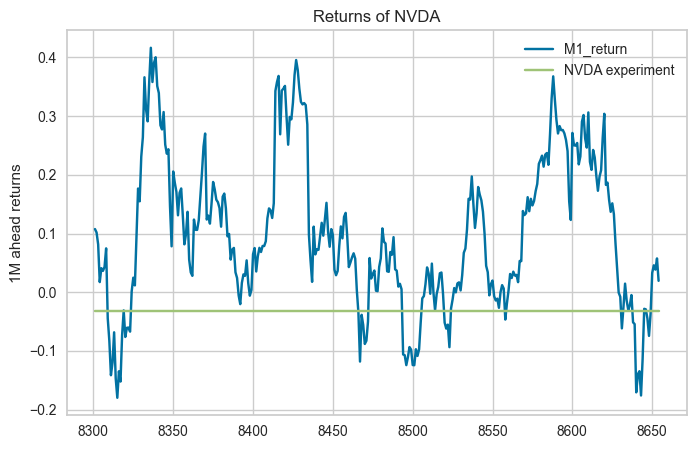

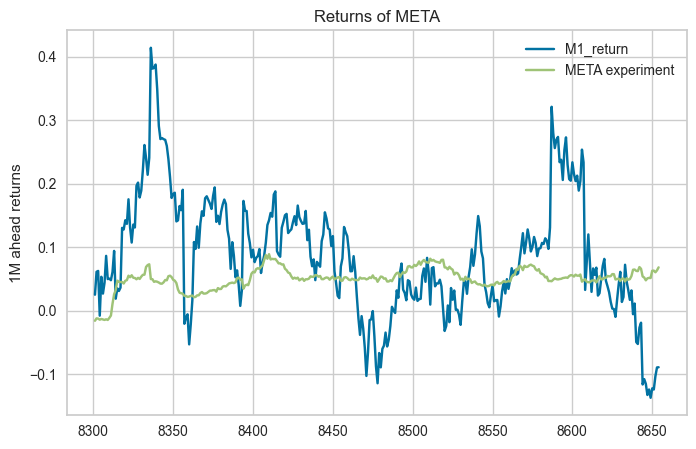

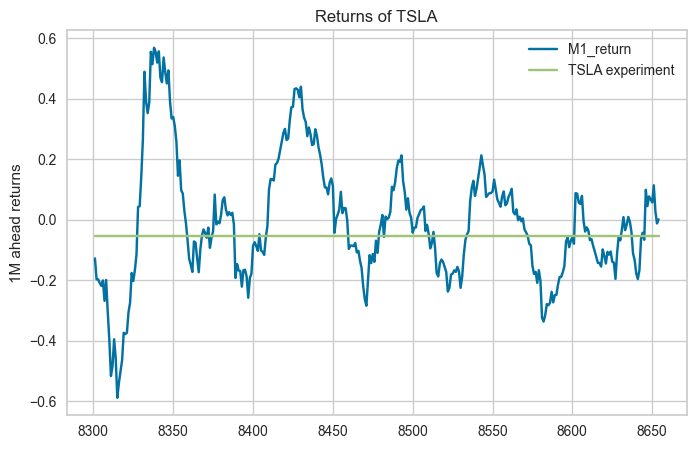

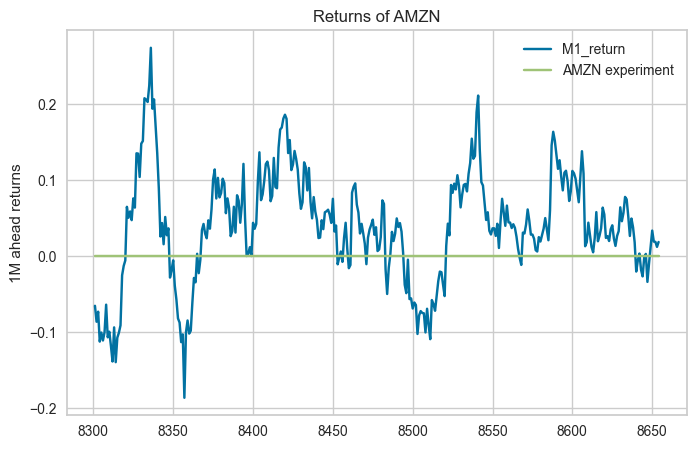

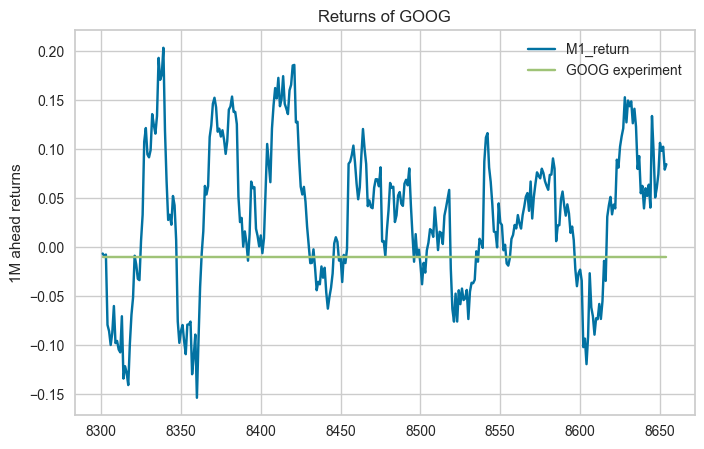

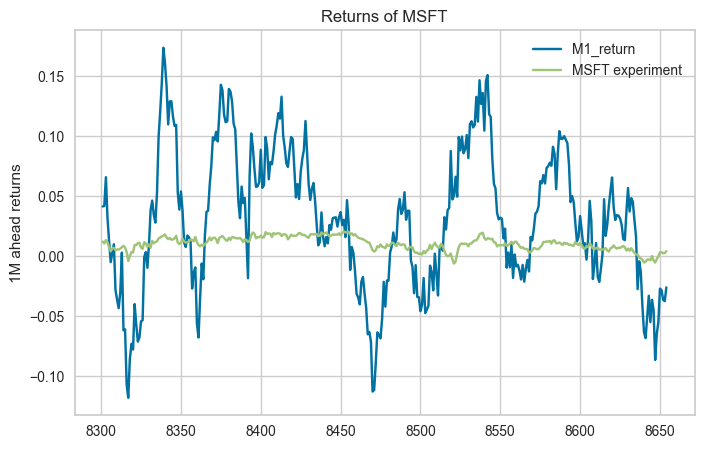

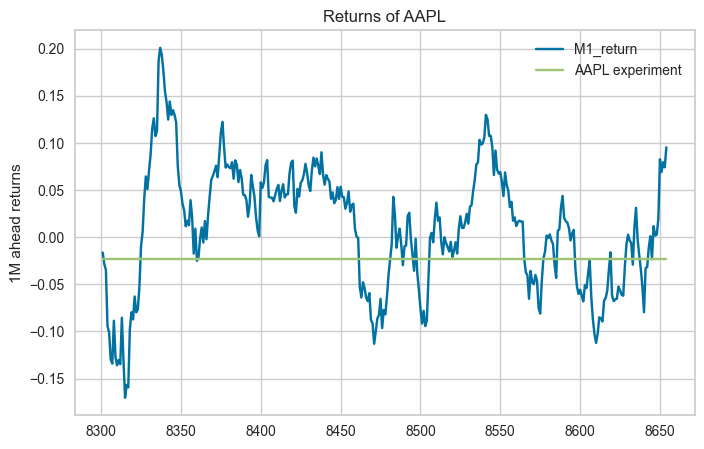

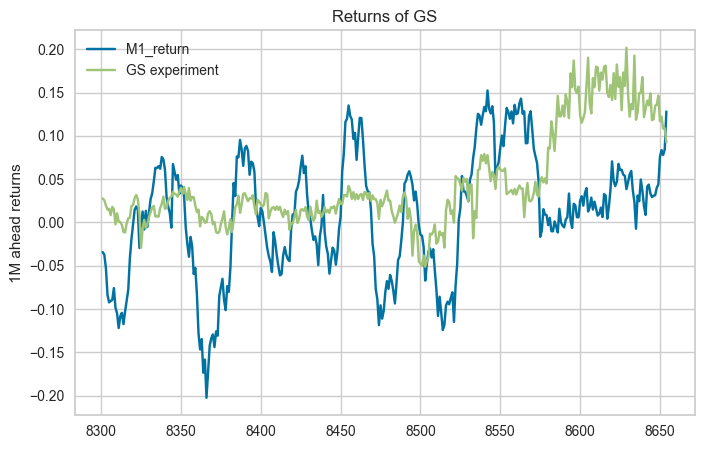

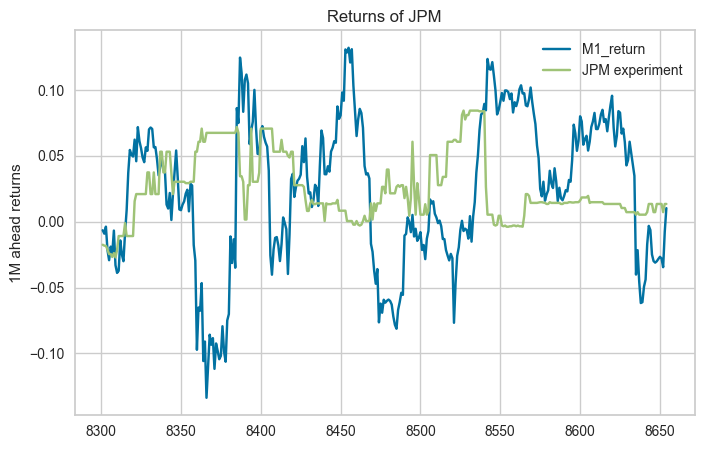

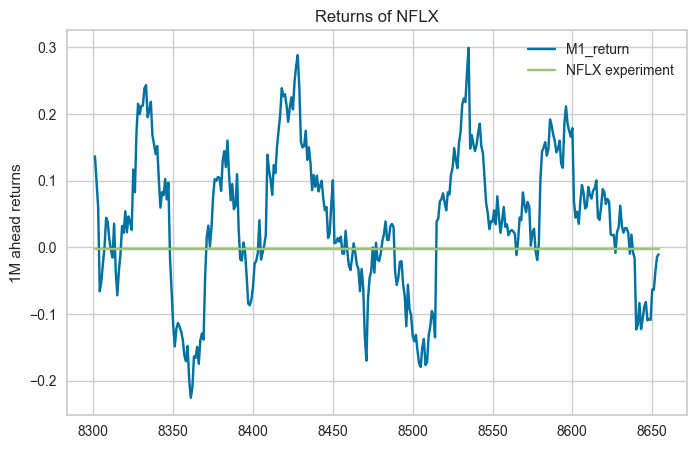

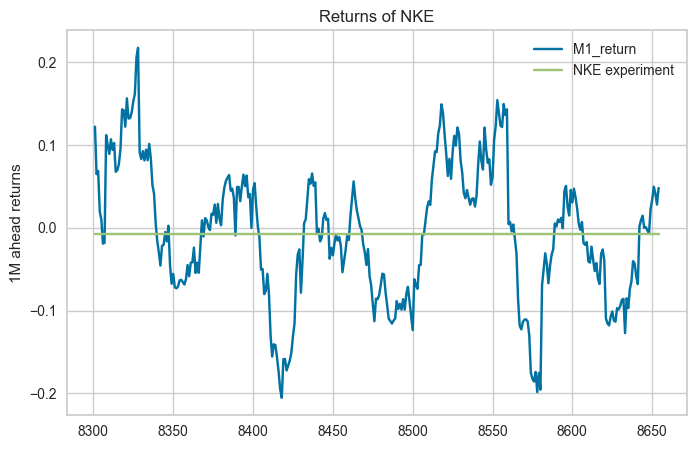

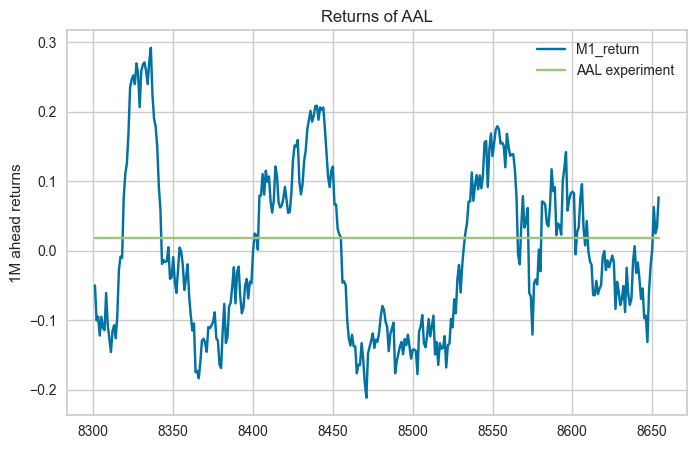

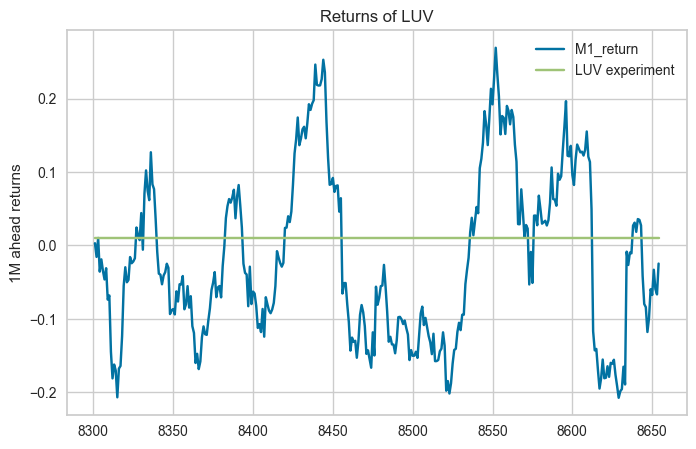

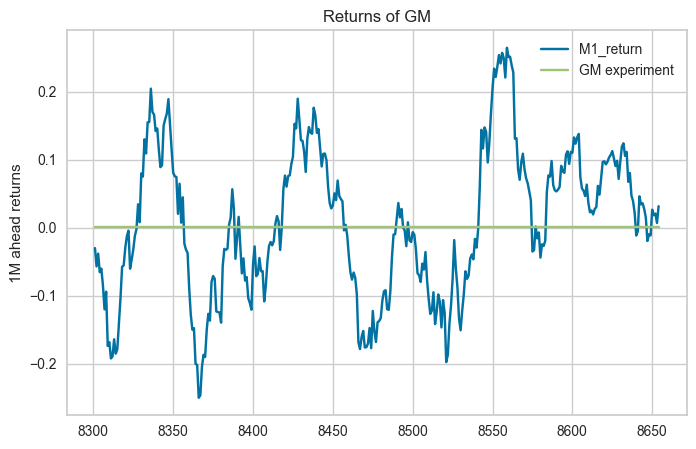

In [71]:
for key,value in Latest_Features.items():
    
    model = setup(Latest_Features[key], target = 'M1_forward_return', fold_strategy = 'timeseries', data_split_shuffle=False, 
                  fold_shuffle=False, transformation = False, transform_target = False ,normalize=True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95, session_id=123, 
                  log_experiment=False, experiment_name=f'{key} experiment')
    
    best_3model = compare_models(n_select = 3)
    blend = blend_models(best_3model)
    pred_holdouts = predict_model(blend)
    
    # Add trace plot
    plt.figure(figsize=(8,5))
    plt.plot(pred_holdouts['M1_return'])
    plt.plot(pred_holdouts['prediction_label'])
    plt.ylabel("1M ahead returns")
    plt.legend(['M1_return', f'{key} experiment'])
    plt.title(f'Returns of {key}');